<a id="there_you_go_1"></a>
# 1) Exploring The Dataset


<a id="there_you_go_1.1"></a>
## 1.1) Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import time
import joblib
from keras.utils import to_categorical
import pickle
import random
from sklearn.metrics import plot_confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv


<a id="there_you_go_1.2"></a>
## 1.2) Extract Dataset

In [2]:
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="there_you_go_1.3"></a>
## 1.3) Examine Dimensions

In [4]:
print("Shape of training set: ", train.shape)
print("Shape of testing set: ", test.shape)

Shape of training set:  (60000, 785)
Shape of testing set:  (10000, 785)


In [5]:
train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

**Labels :**
* **0 - ** T-shirt/top
* **1 - ** Trouser
* **2 - ** Pullover
* **3 - ** Dress
* **4 - ** Coat
* **5 - ** Sandals
* **6 - ** Shirt
* **7 - ** Sneaker
* **8 - ** Bag
* **9 - ** Ankle Boots

<a id="there_you_go_1.4"></a>
## 1.4) Examine NaN Values

In [6]:
# Train
train.isnull().any().sum()

0

In [7]:
# Test
test.isnull().any().sum()

0

<a id="there_you_go_2"></a>
# 2) Visualizing the Dataset

<a id="there_you_go_2.1"></a>
## 2.1) Plotting Images

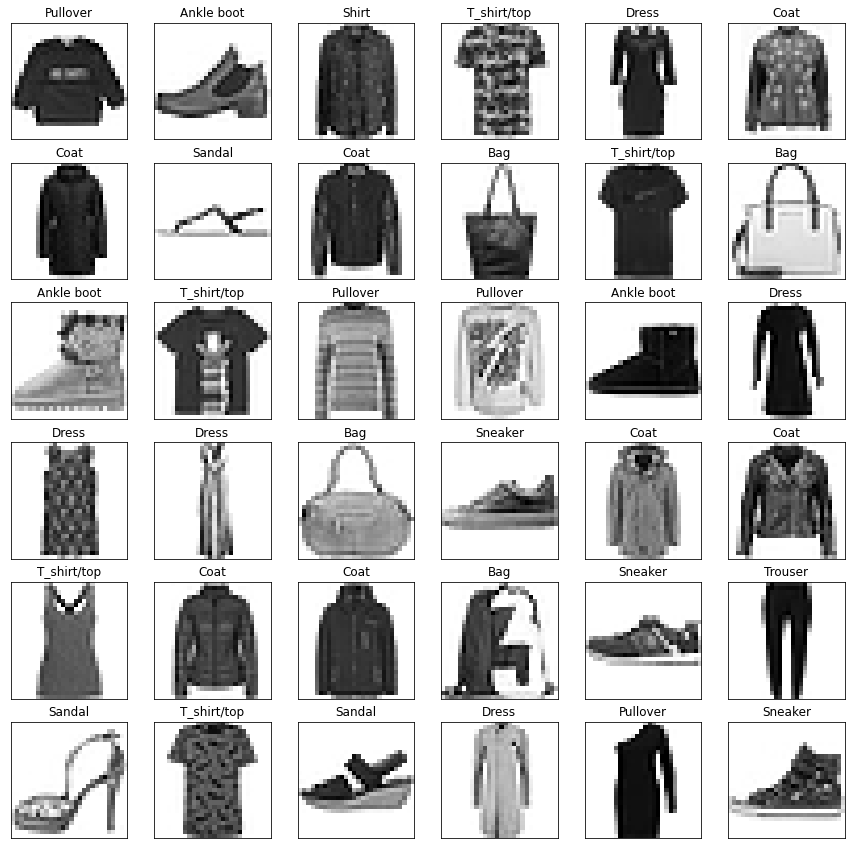

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(15,15))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(train.drop('label', axis=1).values[i].reshape(28,28),cmap=plt.cm.binary)
    index = int(train.label[i])
    plt.title(class_names[index])
    plt.xticks([])
    plt.yticks([])
plt.show()

<a id="there_you_go_2.2"></a>
## 2.2) Distribution of Labels

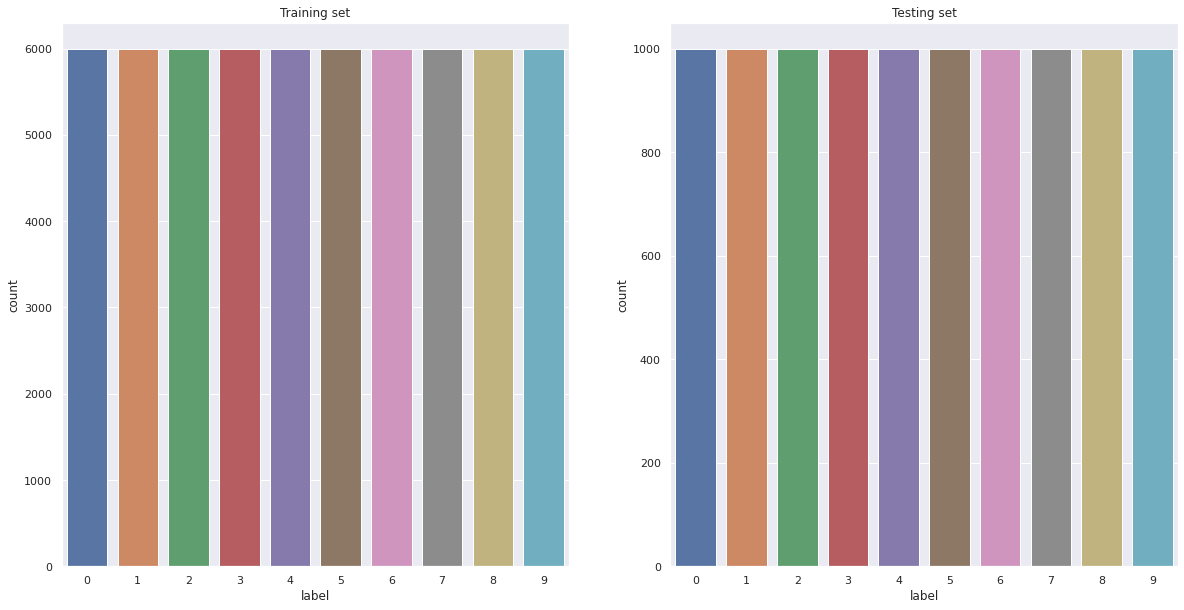

In [9]:
plt.figure(figsize = (20,10)) # Label Count
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.countplot(train['label'])
plt.title("Training set")
plt.subplot(1,2,2)
plt.title("Testing set")
sns.countplot(test['label'])

<a id="there_you_go_3"></a>
# 3) Data PreProcessing

<a id="there_you_go_3.1"></a>
## 3.1) Splitting Data into Train and Test Set


In [10]:
X_train = train.drop(["label"], axis = 1).values
Y_train = train.label
X_test = test.drop(["label"], axis = 1).values
Y_test = test.label

In [11]:
X_train.shape

(60000, 784)

In [12]:
X_train_Raw =X_train
X_test_Raw =X_test
X_train_Raw

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<a id="there_you_go_3.2"></a>
## 3.2) Normalization

In [13]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

<a id="there_you_go_3.3"></a>
## 3.3) Import and Apply PCA

Text(0, 0.5, 'cumulative explained variance')

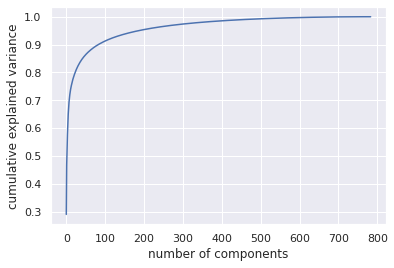

In [14]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [15]:
pca = PCA(n_components=400)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [16]:
X_train_PCA.shape

(60000, 400)

<a id="there_you_go_3.4"></a>
## 3.4) Import and Apply HOG


In [17]:
X_trainHOG=X_train.reshape(60000,28,28)
X_testHOG=X_test.reshape(10000,28,28)

In [18]:
X_train_HOG = []
for i in range(len(X_trainHOG)):
    feature = hog(X_trainHOG[i])
    X_train_HOG.append(feature)
X_train_HOG = np.array(X_train_HOG,dtype = np.float32)
X_test_HOG = []
for i in range(len(X_testHOG)):
    feature = hog(X_testHOG[i])
    X_test_HOG.append(feature)
X_test_HOG = np.array(X_test_HOG,dtype=np.float32)

In [19]:
X_train_HOG.shape

(60000, 81)

<a id="there_you_go_4"></a>
# 4) Building Model

<a id="there_you_go_4.1"></a>
## 4.1) Model SVM default parameters

In [20]:
start = time.time()
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_Raw, Y_train)
Y_pred = SVM.predict(X_test_Raw)
accuracySVM = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracySVM))
timeSVM = time.time() - start
print("time: ",timeSVM)

Accuracy =  0.8921
time:  1062.8568992614746


In [21]:
SVM.predict(X_test_Raw)

array([0, 1, 2, ..., 8, 8, 1])

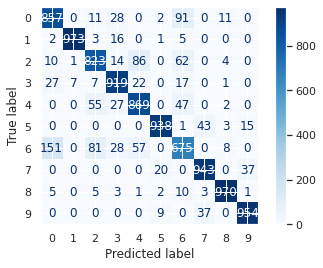

In [22]:
plot_confusion_matrix(SVM, X_test_Raw, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.2"></a>
## 4.2) Model DecisionTree default parameters


In [23]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_Raw, Y_train)
Y_pred = tree.predict(X_test_Raw)
accuracytree = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracytree))
timetree = time.time() - start
print("time: ",timetree)

Accuracy =  0.798
time:  56.16083025932312


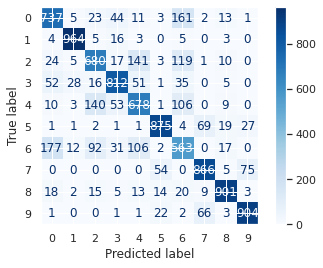

In [24]:
plot_confusion_matrix(tree, X_test_Raw, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.3"></a>
## 4.3) Model SVM Parameter Tuning

In [25]:
start = time.time()
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf',random_state=0,gamma=.03, C=10)
# fit modelT
svmrbf.fit(X_train, Y_train)
Y_pred = svmrbf.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracy))
elapsed = time.time() - start
print("time: ",elapsed)

Accuracy =  0.9142
time:  1580.9625461101532


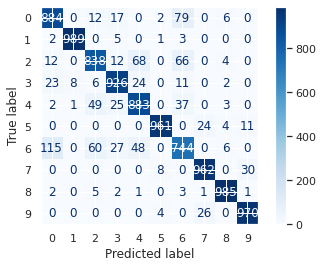

In [26]:
plot_confusion_matrix(svmrbf, X_test, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.4"></a>
## 4.4) Model DecisionTree Parameter Tuning

In [27]:
start = time.time()
# chạy code ở đây
from sklearn.tree import DecisionTreeClassifier
treeE = DecisionTreeClassifier(criterion='entropy',random_state=0)
treeE.fit(X_train, Y_train)
Y_pred = treeE.predict(X_test)
accuracyE = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracyE))
timetreeE = time.time() - start
print("time: ",timetreeE)

Accuracy =  0.8105
time:  51.52186346054077


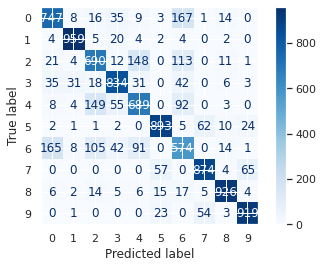

In [28]:
plot_confusion_matrix(treeE, X_test, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.5"></a>
## 4.5) Apply HOG for Model SVM Parameter Tuning

In [29]:
start = time.time()
from sklearn.svm import SVC
SVM_HOG = SVC(kernel='rbf',random_state=0,gamma=.03, C=10)
SVM_HOG.fit(X_train_HOG, Y_train)
Y_pred = SVM_HOG.predict(X_test_HOG)
accuracySVM_HOG = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracySVM_HOG))
timeSVM_HOG = time.time() - start
print("time: ",timeSVM_HOG)

Accuracy =  0.8298
time:  235.73034358024597


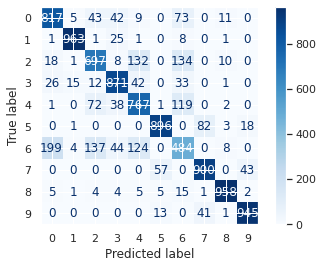

In [30]:
plot_confusion_matrix(SVM_HOG, X_test_HOG, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.6"></a>
## 4.6) Apply HOG for Model DecisionTree Parameter Tuning

In [31]:
start = time.time()
# chạy code ở đây
from sklearn.tree import DecisionTreeClassifier
tree_HOG = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree_HOG.fit(X_train_HOG, Y_train)
Y_pred = tree_HOG.predict(X_test_HOG)
accuracytree_HOG = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracytree_HOG))
timetree_HOG = time.time() - start
print("time: ",timetree_HOG)

Accuracy =  0.736
time:  23.608181476593018


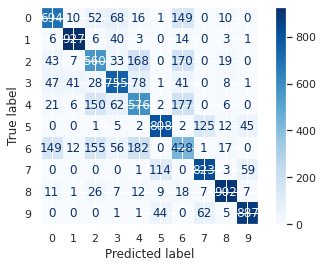

In [32]:
plot_confusion_matrix(tree_HOG, X_test_HOG, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.7"></a>
## 4.7) Apply PCA for Model SVM Parameter Tuning

In [33]:
start = time.time()
from sklearn.svm import SVC
SVM_PCA = SVC(kernel='rbf',random_state=0,gamma=.03, C=10)
SVM_PCA.fit(X_train_PCA, Y_train)
Y_pred = SVM_PCA.predict(X_test_PCA)
accuracySVM_PCA = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracySVM_PCA))
timeSVM_PCA = time.time() - start
print("time: ",timeSVM_PCA)

Accuracy =  0.9137
time:  788.8657786846161


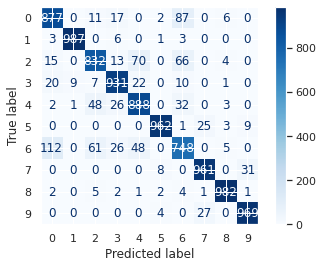

In [34]:
plot_confusion_matrix(SVM_PCA, X_test_PCA, Y_test, cmap=plt.cm.Blues)

<a id="there_you_go_4.8"></a>
## 4.8) Apply PCA for Model DecisionTree Parameter Tuning

In [35]:
start = time.time()
# chạy code ở đây
from sklearn.tree import DecisionTreeClassifier
tree_PCA = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree_PCA.fit(X_train_PCA, Y_train)
Y_pred = tree_PCA.predict(X_test_PCA)
accuracytree_PCA = accuracy_score(Y_test,Y_pred)
print("Accuracy = ",(accuracytree_PCA))
timetree_PCA = time.time() - start
print("time: ",timetree_PCA)

Accuracy =  0.7715
time:  144.09380984306335


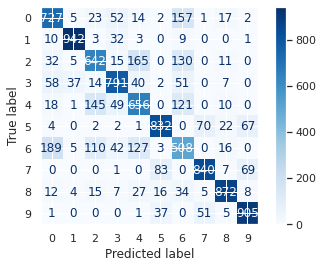

In [36]:
plot_confusion_matrix(tree_PCA, X_test_PCA, Y_test, cmap=plt.cm.Blues)